In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
import nltk
nltk.download('stopwords')
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
data_2015 = pd.read_json("../gg2015.json")

In [9]:
df_2015 = pd.DataFrame(data_2015)

In [10]:
df_2015.columns.values

array(['id', 'text', 'timestamp_ms', 'user'], dtype=object)

In [11]:
df_2015.head()

,id,text,timestamp_ms,user
0,554402424728072192,just had to scramble to find a golden globes s...,2015-01-11 22:20:13.011,"{'id': 19904553, 'screen_name': 'baumbaTz'}"
1,554403686428864513,RT @ENews: Show us how you're watching the #Go...,2015-01-11 22:25:13.824,"{'id': 85020476, 'screen_name': 'devinaaaprilia'}"
2,554403686617985024,@danaKStew @50ShadesWorldcm @ScarletteDrake Al...,2015-01-11 22:25:13.869,"{'id': 1433214326, 'screen_name': 'jamiedornan..."
3,554403686865440769,RT @lisarinna: When your husband tells you tha...,2015-01-11 22:25:13.928,"{'id': 505974820, 'screen_name': 'WyAttDoRiAn'}"
4,554403687448469504,“@goldenglobes: Creating multiple mini Moët Mo...,2015-01-11 22:25:14.067,"{'id': 146599313, 'screen_name': 'Rascal207'}"


In [12]:
df_2015['word_count'] = df_2015['text'].apply(lambda x: len(str(x).split(" ")))

In [13]:
df_2015.columns.values

array(['id', 'text', 'timestamp_ms', 'user', 'word_count'], dtype=object)

In [14]:
df_2015[["text","word_count"]].head()

,text,word_count
0,just had to scramble to find a golden globes s...,14
1,RT @ENews: Show us how you're watching the #Go...,23
2,@danaKStew @50ShadesWorldcm @ScarletteDrake Al...,14
3,RT @lisarinna: When your husband tells you tha...,23
4,“@goldenglobes: Creating multiple mini Moët Mo...,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD66F125C0>]],
      dtype=object)

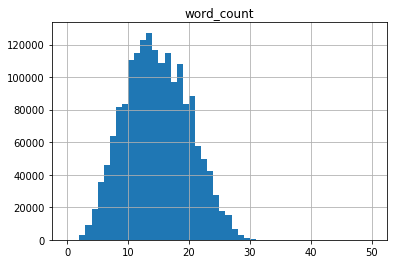

In [15]:
df_2015.hist(column="word_count",bins=50,range=(0,50))

In [16]:
df_2015.max(0)

id                                554547408600707072
text            󾮟󾮟: estoy viendo Golden Globe Awards
timestamp_ms              2015-01-12 07:56:19.860000
word_count                                        98
dtype: object

In [27]:
print(df_2015.loc[df_2015["word_count"] > 50])

                         id  \
10268    554412852677988353   
197938   554430608449863682   
238859   554432973073055745   
480888   554445667473829889   
490749   554445981219950592   
598963   554450036181200896   
706080   554454011110518784   
759358   554455957695373312   
780500   554456516820885504   
790270   554456801534824449   
808765   554457468596928512   
834719   554458409056354305   
838288   554458541159755776   
1007648  554465753970130944   
1016699  554466169273733120   
1017324  554466204509691904   
1019802  554466354728673281   
1020692  554466408005128192   
1033822  554467005865398274   
1035460  554467065781059585   
1035978  554467084756082689   
1036857  554467117291286529   
1049762  554467682696040449   
1057737  554468074259099651   
1070665  554468819914485760   
1074128  554468977519628288   
1134904  554472029085503490   
1142921  554472441301303296   
1146570  554472632016728065   
1147333  554472667676696576   
1171929  554473495426760704   
1467752 

In [62]:
#from nltk.corpus import stopwords
#stop = stopwords.words('english')

df_2015['hash'] = df_2015['text'].apply(lambda x: ' '.join([x for x in x.split() if x[0] in "#"]))

In [63]:
df_2015['hash']

0                                                      
1                             #GoldenGlobes #ERedCarpet
2                                                      
3                                         #GoldenGlobes
4                                          #MoetMoment”
5                                                      
6                                                      
7                           #GoldenGlobes #AcademyAward
8                     #GoldenGlobes #StVincent #writing
9                                                      
10                 #goldenglobes #hollywood #redcarpet…
11                             #RainySunday #ERedCarpet
12                                                     
13                                                     
14                                 #TinaFey #AmyPoehler
15                                                     
16                                         #GoldenGlobe
17                                              

In [58]:
single_string[0:100]

"[] ['#GoldenGlobes', '#ERedCarpet'] [] ['#GoldenGlobes'] ['#MoetMoment”'] [] [] ['#GoldenGlobes', '#"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D5A2BC4E0>]],
      dtype=object)

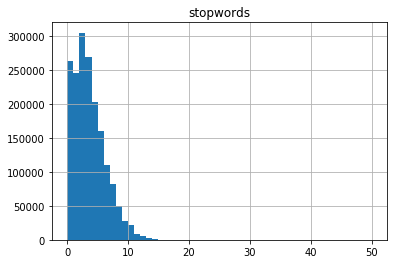

In [41]:
df_2015.hist(column="stopwords",bins=50,range=(0,50))

Potential Preprocessing methods 

- Lower case
- Removing Punctuation
- Removal of stop words (may not want for syntatic parsing)
- Common Word Removal
- Rare Word Removal
- Spelling correction (we may be able to use TextBlob) - time intensive
- Tokenization (dividing the text into a sequence of words or sentence)​
- Stemming (removal of suffices) 
- Lemmatization


In [52]:
def clean_it_1(dataframe,current,target):
    """
    Takes in a dataframe, and appends a cleaned version of the text columnwise
    Itype: dataframe (df), current (string), target(string)
    Rtype: dataframe  
    """
    # make all lowercase
    dataframe[target] = dataframe[current].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # remove punctuation
    dataframe[target] = dataframe[target].str.replace('[^\w\s]','')  # Need to check exactly what is removed
    
    # add in a tokenizen
    # dataframe["token_clean"] = dataframe[target].apply(word_tokenize) 
    return dataframe

In [50]:
# df_2015["cleaned"] = df_2015["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


df_2015_clean = clean_it_1(df_2015,"text","cleaned")

In [53]:
df_2015.columns.values

array(['id', 'text', 'timestamp_ms', 'user', 'word_count', 'stopwords',
       'cleaned'], dtype=object)

In [59]:
df_2015.drop(columns=["cleaned","timestamp_ms","user"]);

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
df_2015_clean = clean_it_1(df_2015,"text","cleaned")

In [64]:
df_2015_clean.head()

,id,text,timestamp_ms,user,word_count,stopwords,cleaned,token_clean
0,554402424728072192,just had to scramble to find a golden globes s...,2015-01-11 22:20:13.011,"{'id': 19904553, 'screen_name': 'baumbaTz'}",14,7,just had to scramble to find a golden globes s...,"[just, had, to, scramble, to, find, a, golden,..."
1,554403686428864513,RT @ENews: Show us how you're watching the #Go...,2015-01-11 22:25:13.824,"{'id': 85020476, 'screen_name': 'devinaaaprilia'}",23,7,rt enews show us how youre watching the golden...,"[rt, enews, show, us, how, youre, watching, th..."
2,554403686617985024,@danaKStew @50ShadesWorldcm @ScarletteDrake Al...,2015-01-11 22:25:13.869,"{'id': 1433214326, 'screen_name': 'jamiedornan...",14,0,danakstew 50shadesworldcm scarlettedrake also ...,"[danakstew, 50shadesworldcm, scarlettedrake, a..."
3,554403686865440769,RT @lisarinna: When your husband tells you tha...,2015-01-11 22:25:13.928,"{'id': 505974820, 'screen_name': 'WyAttDoRiAn'}",23,9,rt lisarinna when your husband tells you that ...,"[rt, lisarinna, when, your, husband, tells, yo..."
4,554403687448469504,“@goldenglobes: Creating multiple mini Moët Mo...,2015-01-11 22:25:14.067,"{'id': 146599313, 'screen_name': 'Rascal207'}",17,3,goldenglobes creating multiple mini moët momen...,"[goldenglobes, creating, multiple, mini, moët,..."


In [1]:
print("Test")

Test


In [4]:
df_2015_clean.head()

NameError: name 'df_2015_clean' is not defined

In [17]:
df_2015

,id,text,timestamp_ms,user,word_count
0,554402424728072192,just had to scramble to find a golden globes s...,2015-01-11 22:20:13.011,"{'id': 19904553, 'screen_name': 'baumbaTz'}",14
1,554403686428864513,RT @ENews: Show us how you're watching the #Go...,2015-01-11 22:25:13.824,"{'id': 85020476, 'screen_name': 'devinaaaprilia'}",23
2,554403686617985024,@danaKStew @50ShadesWorldcm @ScarletteDrake Al...,2015-01-11 22:25:13.869,"{'id': 1433214326, 'screen_name': 'jamiedornan...",14
3,554403686865440769,RT @lisarinna: When your husband tells you tha...,2015-01-11 22:25:13.928,"{'id': 505974820, 'screen_name': 'WyAttDoRiAn'}",23
4,554403687448469504,“@goldenglobes: Creating multiple mini Moët Mo...,2015-01-11 22:25:14.067,"{'id': 146599313, 'screen_name': 'Rascal207'}",17
5,554403687947571200,@pattistarz watching dallas game? watching gol...,2015-01-11 22:25:14.186,"{'id': 71577509, 'screen_name': 'jezzygirl1'}",8
6,554403688035667968,“@MileyRayKingdom: Cara's attending the Golden...,2015-01-11 22:25:14.207,"{'id': 919291980, 'screen_name': 'TASTEDCYRUS'}",18
7,554403688425746433,"With the #GoldenGlobes tonight, I think I'll l...",2015-01-11 22:25:14.300,"{'id': 19465358, 'screen_name': 'pj_campbell'}",20
8,554403689126170624,@theodoremelfi best of luck old friend #Golden...,2015-01-11 22:25:14.467,"{'id': 26075349, 'screen_name': 'stevethelegend'}",9
9,554403690300604417,@willoconnell Red carpet on E. Then watch awar...,2015-01-11 22:25:14.747,"{'id': 24298068, 'screen_name': 'liamobrienact...",10


In [18]:
from nltk.probability import FreqDist

#FreqDist(each_gram for each_gram in n_gram)

In [20]:
# tweet_list = list()

unary_freq = FreqDist(df_2015['text'])

In [35]:
def single_token(df, target):
   # Setup the vocabulary for the ngrams
   single_list = list(df[target])
   single_string = ' '.join(map(str, single_list))
   tokens = word_tokenize(single_string)
   return tokens

In [36]:
tokens = single_token(df_2015,"text")

In [38]:
fdist = FreqDist(tokens)

In [44]:
fdist.most_common(100);